In [2]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('18.csv')
df.shape

(10499, 2)

In [4]:
df.head()

,Time,domain
0,2022-01-22 19:34:14,mail.google.com
1,2022-01-22 19:34:34,www.instagram.com
2,2022-01-22 19:35:30,www.youtube.com
3,2022-01-22 19:38:16,www.youtube.com
4,2022-01-22 19:40:47,www.google.com


In [5]:
df.tail()

,Time,domain
10494,2022-04-19 15:54:38,localhost:8888
10495,2022-04-19 15:54:49,localhost:8889
10496,2022-04-19 16:00:11,localhost:8889
10497,2022-04-19 16:01:41,localhost:8888
10498,2022-04-19 16:01:46,localhost:8888


In [7]:
df.isna().sum()

Time        0
domain    107
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
sum(df['Time'] < '1900')

0

In [10]:
df = df[df.Time > '1900'].copy() 

In [11]:
df['Time'] = pd.to_datetime(df['Time'])

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-01-22 19:34:14,mail.google.com
1,2022-01-22 19:34:34,www.instagram.com
2,2022-01-22 19:35:30,www.youtube.com
3,2022-01-22 19:38:16,www.youtube.com
4,2022-01-22 19:40:47,www.google.com


In [14]:
df['domain'].value_counts()[:50]

www.google.com                                                   2915
www.amazon.com                                                    797
www.youtube.com                                                   761
webauth.umbc.edu                                                  750
github.com                                                        699
blackboard.umbc.edu                                               424
localhost:8888                                                    238
scholar.google.com                                                207
myretrievercare.umbc.edu                                          199
my.umbc.edu                                                       142
www.reddit.com                                                    138
csprd-web.ps.umbc.edu                                             126
mail.google.com                                                   120
www.apple.com                                                     108
my3.my.umbc.edu     

<AxesSubplot:>

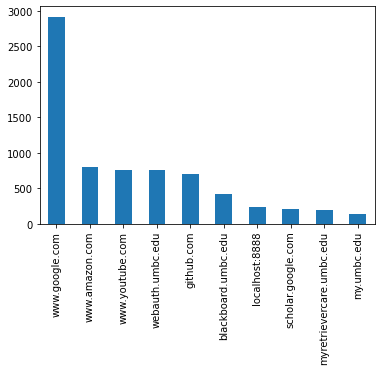

In [15]:
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      475
1      354
2      428
3      161
4       47
5        3
7       55
8       29
9       64
10     164
11     385
12     232
13     366
14     544
15     471
16     649
17    1135
18     958
19     846
20     694
21     835
22     828
23     669
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

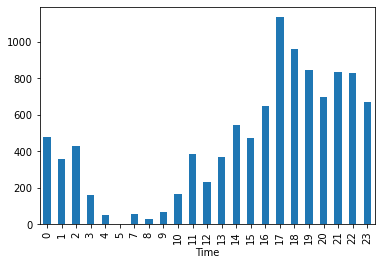

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-01-22 19:34:14,mail.google.com,Saturday,5
1,2022-01-22 19:34:34,www.instagram.com,Saturday,5
2,2022-01-22 19:35:30,www.youtube.com,Saturday,5
3,2022-01-22 19:38:16,www.youtube.com,Saturday,5
4,2022-01-22 19:40:47,www.google.com,Saturday,5


In [19]:
df['Day'].value_counts()

Sunday       2253
Tuesday      1701
Wednesday    1495
Saturday     1413
Thursday     1359
Friday       1095
Monday       1076
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1076
1    1701
2    1495
3    1359
4    1095
5    1413
6    2253
Name: DayIndex, dtype: int64

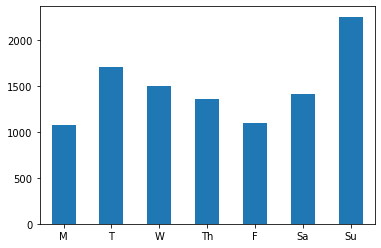

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-22 19:34:14,mail.google.com,Saturday,5,True
1,2022-01-22 19:34:34,www.instagram.com,Saturday,5,True
2,2022-01-22 19:35:30,www.youtube.com,Saturday,5,True
3,2022-01-22 19:38:16,www.youtube.com,Saturday,5,True
4,2022-01-22 19:40:47,www.google.com,Saturday,5,True


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-01-22 19:34:14,mail.google.com,Saturday,5,True
1,2022-01-22 19:34:34,www.instagram.com,Saturday,5,True
2,2022-01-22 19:35:30,www.youtube.com,Saturday,5,True
3,2022-01-22 19:38:16,www.youtube.com,Saturday,5,True
4,2022-01-22 19:40:47,www.google.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

www.google.com      1674
github.com           680
www.amazon.com       579
www.youtube.com      573
webauth.umbc.edu     476
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

www.google.com         1241
webauth.umbc.edu        274
www.amazon.com          218
scholar.google.com      207
blackboard.umbc.edu     193
Name: domain, dtype: int64

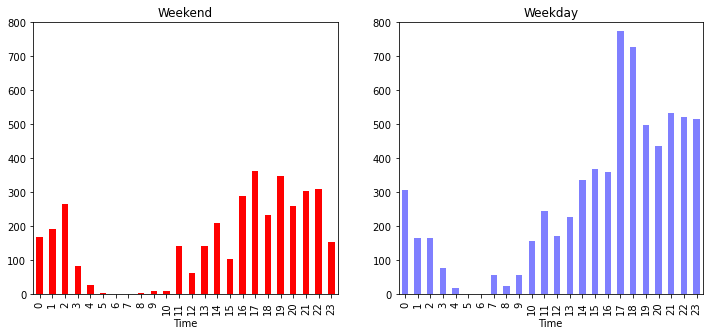

In [43]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0,800])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()

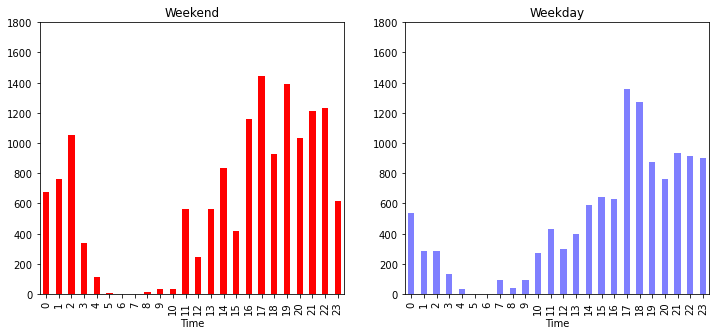

In [28]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [34]:
df['domain'].value_counts()[:10]

www.google.com              2915
www.amazon.com               797
www.youtube.com              761
webauth.umbc.edu             750
github.com                   699
blackboard.umbc.edu          424
localhost:8888               238
scholar.google.com           207
myretrievercare.umbc.edu     199
my.umbc.edu                  142
Name: domain, dtype: int64

In [35]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

In [84]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    plt.ylim(ymin=0,ymax=400)
    return data

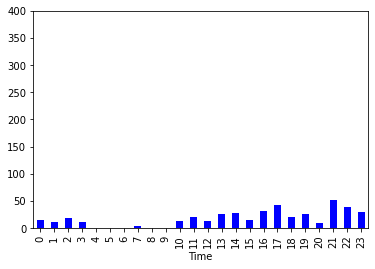

In [85]:
_= show_domain_stats('blackboard.umbc.edu', 'blue')

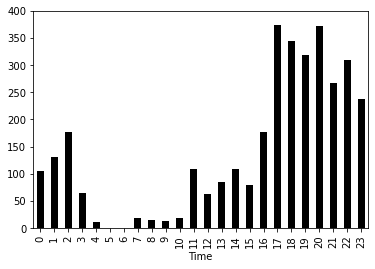

In [100]:
_= show_domain_stats('google', 'black')

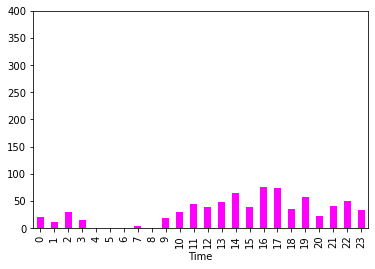

In [87]:
_ = show_domain_stats('webauth.umbc', 'magenta')


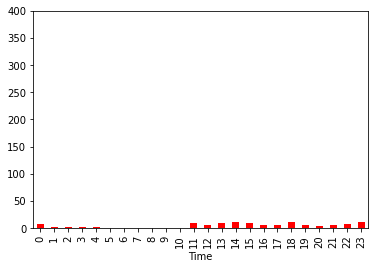

In [88]:
_ = show_domain_stats('mail.google', 'red')

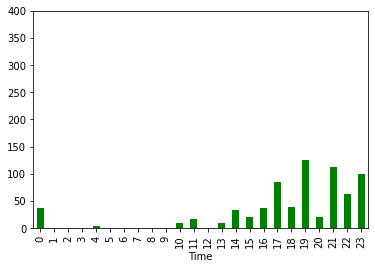

In [89]:
_ = show_domain_stats('github', 'green')

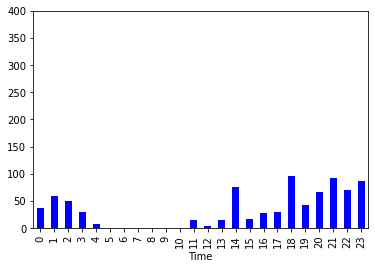

In [90]:
_= show_domain_stats('amazon', 'blue')

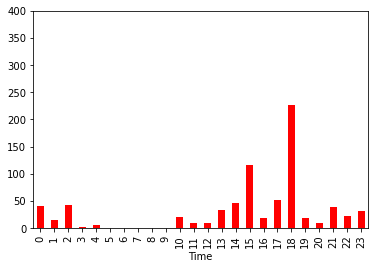

In [99]:
_= show_domain_stats('youtube', 'red')

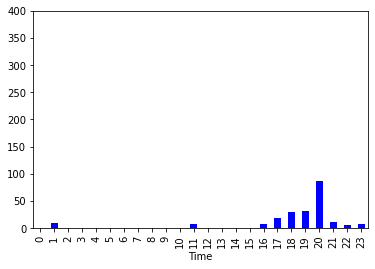

In [92]:
_= show_domain_stats('scholar', 'blue')

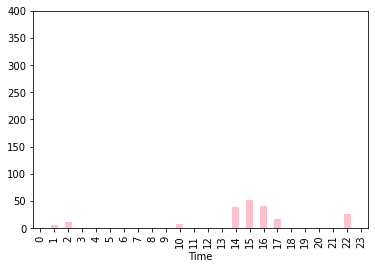

In [98]:
_= show_domain_stats('myretrievercare', 'pink')

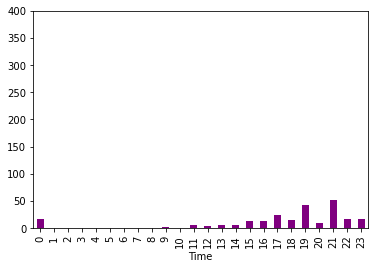

In [97]:
_= show_domain_stats('localhost:8888', 'purple')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

#### Answers
1. i believe this is a work computer 
1. he/she is not employed and also from the websites visisted it can be easily concluded that he/she is a student
1. the prime hours are from 17-2
1. searching for scholary content most of time while trying to shop few times too
